In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

# Solar Correction Factor 

The raw neutron counts need to be corrected for variations in the incoming cosmic ray flux, called solar correction. Therefore a neutron measurement is needed that is not covered by snow or water and therefore only measures variations in the incoming neutron flux. Multiple CRNS are available around the globe summarized on https://www.nmdb.eu/ (More details in the slides). The best is to choose a neutron sensor at a similar cutoff rigidity as your own position. Like that you correction is most accurate. This is unfortunatly not always possible, therefore Desilets et al. 2023 developped a parametrization based on cutoff rigidity and atmospheric depth to get the solar correction factor for any place on earth using an aribitrary reference sensor. 

## Example Hintereisferner

A very practical website exists calulating the solar correction for a specific point on earth: https://crnslab.org/
Use the calculator (https://crnslab.org/util/solar.php) to get the solar correction factor based on the Jungfraujoch neutron monitor.
For HEF\
Input: Pressure= 703mb, Latitude=46.791, Longitutde=10.7485\
Results: Rc = 4.36  GV,  x = 717.2  g cm^-2,  **tau = 1.012**

In [2]:
f_sol_crnslab = pd.read_csv('f_sol_HEF.dat', parse_dates=['TIMESTAMP'], dtype=np.float64, index_col='TIMESTAMP')
f_JUNG = pd.read_csv('F_JUNG.dat', parse_dates=['TIMESTAMP'], dtype=np.float64, index_col='TIMESTAMP', sep=';')

You can also calculate tau yourself using: https://crnslab.org/util/tau.php and use any neutron sensor around the world to do the solar correction 

In [3]:
# Example 
tau = 1.012 # From crnslab calculated input: p = 703, lat= 46.791, lon=10.7485, year = 2020
f_sol_tau = 1/(1.004 * (f_JUNG/f_JUNG.mean())+1-1.004)

(0.8, 1.2)

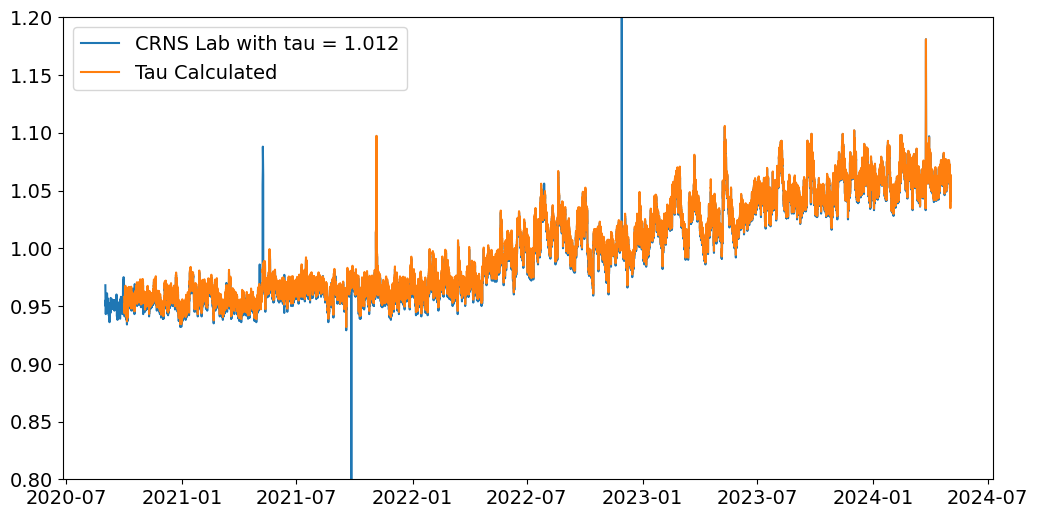

In [4]:
plt.figure(figsize=(12,6)) 
plt.plot(f_sol_crnslab, label='CRNS Lab with tau = 1.012')
plt.plot(f_sol_tau, label='Tau Calculated')
plt.legend()
plt.ylim(0.8,1.2)

(0.8, 1.2)

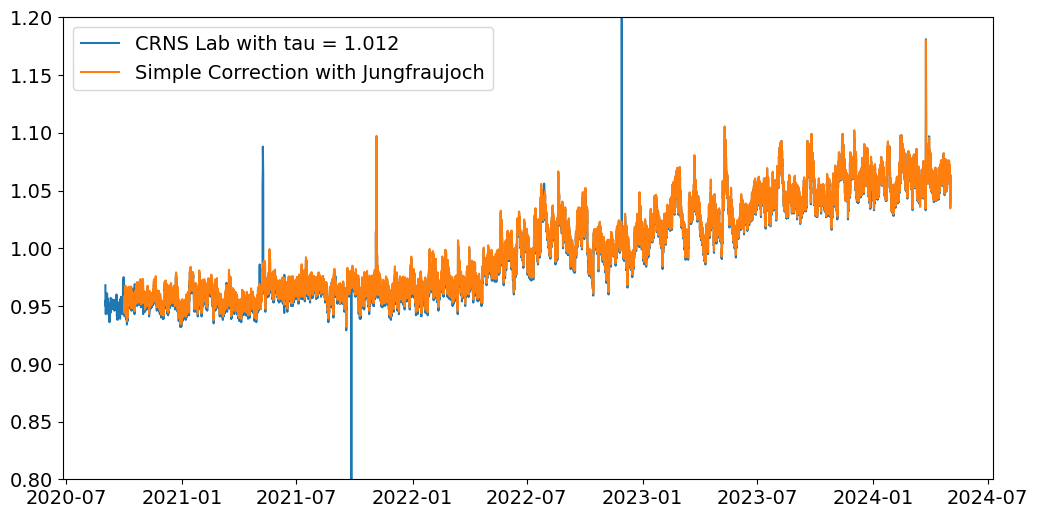

In [5]:
f_simple_JUNG = f_JUNG.mean()/f_JUNG

plt.figure(figsize=(12,6)) 
plt.plot(f_sol_crnslab, label='CRNS Lab with tau = 1.012')
#plt.plot(f_sol_tau, label='Tau Calculated')
plt.plot(f_simple_JUNG, label='Simple Correction with Jungfraujoch')
plt.legend()
plt.ylim(0.8,1.2)

This works really well, mostly because Jungfraujoch is very close to Hintereisferner! What about our glacier here in Bolivia? 

## Huayna Potosi Example

Approximate coordinates: 
N-16.2662,E-68.1675 (291.8325 E in the calculator)\
Altitude: 5080 m a.s.l. --> estimated pressure:  534.74  mb

Calculator shows with this input Rc = 11.46  GV,  x = 547.3  g cm^-2, **tau = 0.421**

In [6]:
f_sol_BOL = pd.read_csv('f_sol_BOL.dat', parse_dates=['TIMESTAMP'], dtype=np.float64, index_col='TIMESTAMP')

(0.8, 1.2)

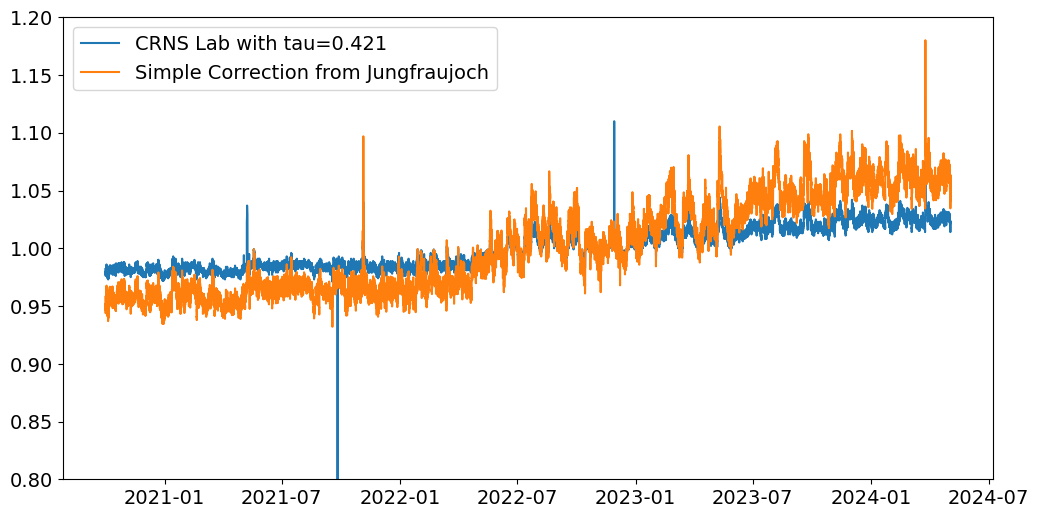

In [7]:
plt.figure(figsize=(12,6)) 
plt.plot(f_sol_BOL, label='CRNS Lab with tau=0.421')
plt.plot(f_simple_JUNG, label='Simple Correction from Jungfraujoch')
plt.legend()
plt.ylim(0.8,1.2)

We can see that here the simple solar correction doesnt do a great job compared to the tau-method. Unfortunatly we have no CRNS in the region to double check this.

### References
McJannet, D. L., & Desilets, D. (2023). Incoming Neutron Flux Corrections for Cosmic‐Ray Soil and Snow Sensors Using the Global Neutron Monitor Network. Water Resources Research, 59(4), e2022WR033889.